In [1]:
import numpy as np

from robust_smc.data import TANSimulator, ExplosiveTANSimulator
from robust_smc.sampler import LinearDiagonalGaussianBPF

import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
simulator = ExplosiveTANSimulator(100, observation_std=20.0, seed=42)

In [3]:
num_samples = 1000
# prior_std = np.array([1e3, 1e3, 1e3, 3.0, 1.0, 1.0])
# prior_std = simulator.process_std
prior_std = np.array([1e-1, 1e-1, 1.0, 1e-2, 1e-2, 1e-1])
transition_matrix = simulator.transition_matrix
# x_init = np.zeros((1000, 6))
x_init = np.repeat(simulator.X0[None, :], num_samples, axis=0)
noise_std = 20.0

In [4]:
sampler = LinearDiagonalGaussianBPF(
    simulator.Y, transition_matrix=transition_matrix, prior_std=prior_std, 
    x_init=x_init, observation_model=simulator.observation_model,
    num_samples=num_samples
)

In [5]:
sampler.sample()

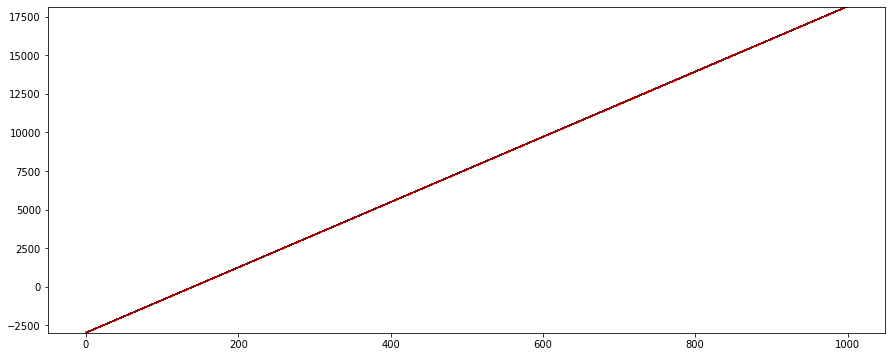

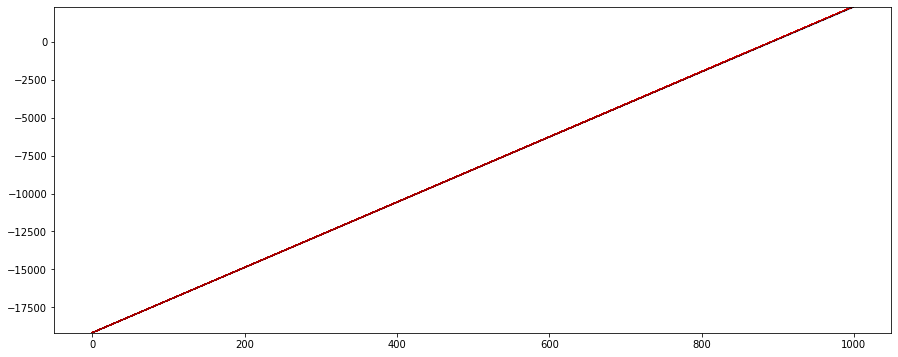

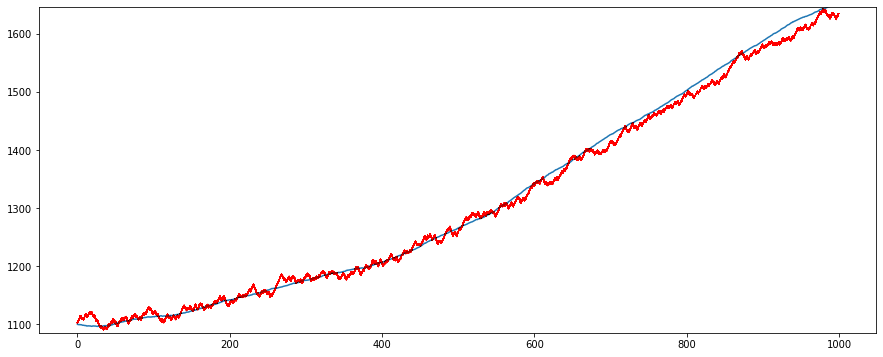

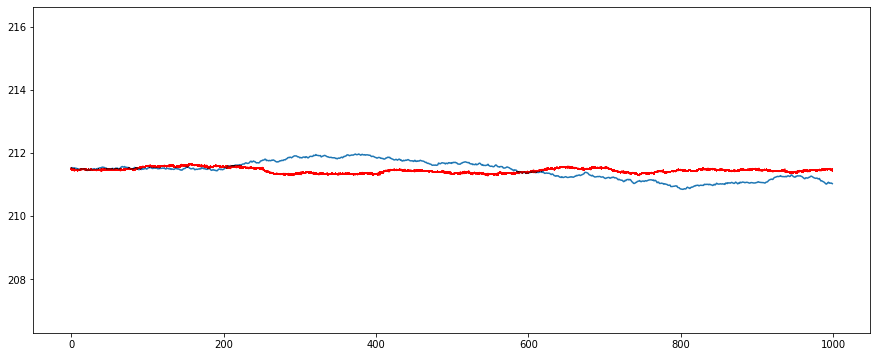

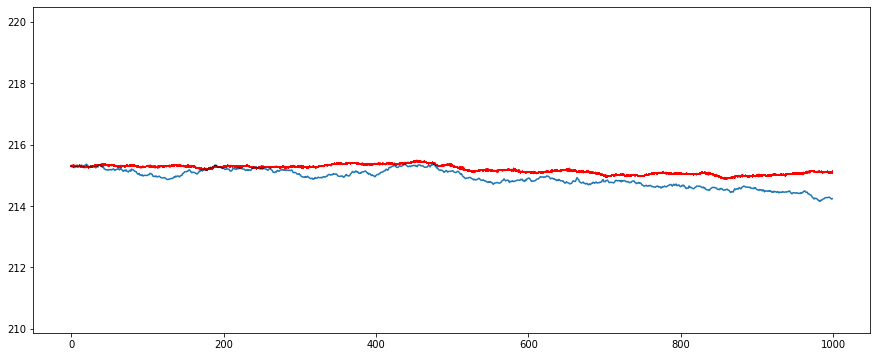

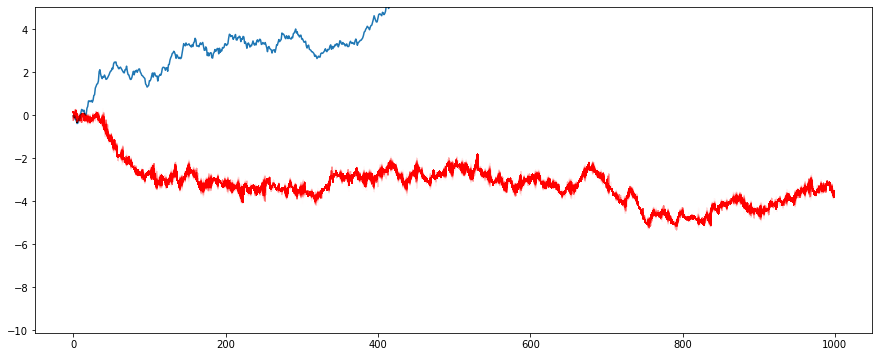

In [6]:
for var in range(6):
    plt.figure(figsize=(15, 6))
    traj = np.stack(sampler.x_trajectories)
    plt.plot(simulator.X[1:, var])
    for i in range(num_samples):
        plt.plot(traj[:, i, var], c='r', alpha=0.01, ls='-')
        lims = (np.min(traj[:, i, var]), np.max(traj[:, i, var]))
        plt.ylim(lims[0] - 5., lims[1] + 5.0)